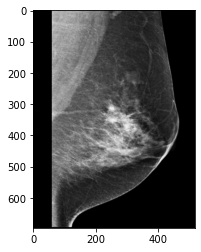

In [56]:
import skimage.segmentation
from matplotlib import pyplot as plt
import numpy as np
import imageio

img1 = imageio.imread("/Users/MayraBerrones/Documents/VisualCode/Incan/Anomalia/130019, 17.12.12, RMLO.png", pilmode = 'RGB')
img2 = imageio.imread("/Users/MayraBerrones/Documents/VisualCode/Incan/Anomalia/130019, 17.12.12, RMLO.png", pilmode = 'L')
segment_mask1 = skimage.segmentation.felzenszwalb(img2, scale=100)
segment_mask2 = skimage.segmentation.felzenszwalb(img2, scale=500)

fig, ax = plt.subplots()
ax.imshow(img2, cmap='gray')
plt.show()

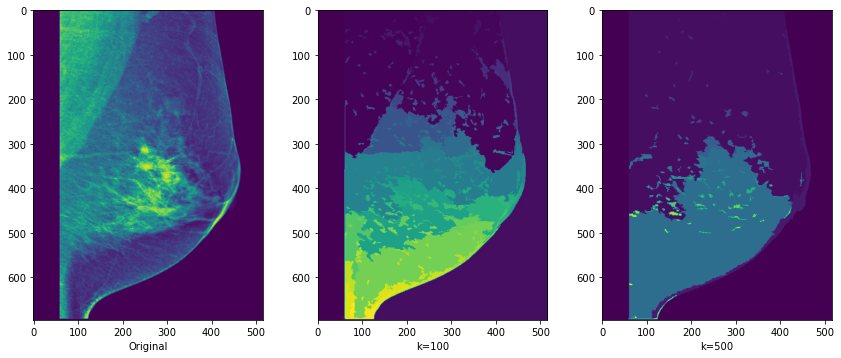

In [62]:
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(131)
ax2 = fig.add_subplot(132)
ax3 = fig.add_subplot(133)
ax1.imshow(img2); ax1.set_xlabel("Original")
ax2.imshow(segment_mask1); ax2.set_xlabel("k=100")
ax3.imshow(segment_mask2); ax3.set_xlabel("k=500")
plt.tight_layout()
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/hw17_flitz_segm.png')
plt.show()

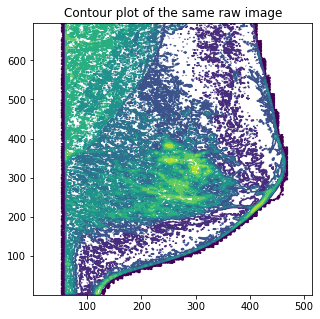

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import ndimage as ndi

from skimage import (
    color, feature, filters, measure, morphology, segmentation, util
)

fig, ax = plt.subplots(figsize=(5, 5))
qcs = ax.contour(img2, origin='image')
ax.set_title('Contour plot of the same raw image')
plt.show()

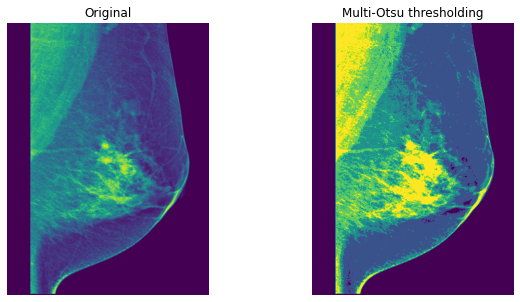

In [20]:
thresholds = filters.threshold_multiotsu(img2, classes=5)
regions = np.digitize(img2, bins=thresholds)

fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
ax[0].imshow(img2)
ax[0].set_title('Original')
ax[0].axis('off')
ax[1].imshow(regions)
ax[1].set_title('Multi-Otsu thresholding')
ax[1].axis('off')
plt.show()

In [21]:
cells = img2 > thresholds[0]
dividing = img2 > thresholds[1]
labeled_cells = measure.label(cells)
labeled_dividing = measure.label(dividing)
naive_mi = labeled_dividing.max() / labeled_cells.max()
print(naive_mi)

101.66666666666667


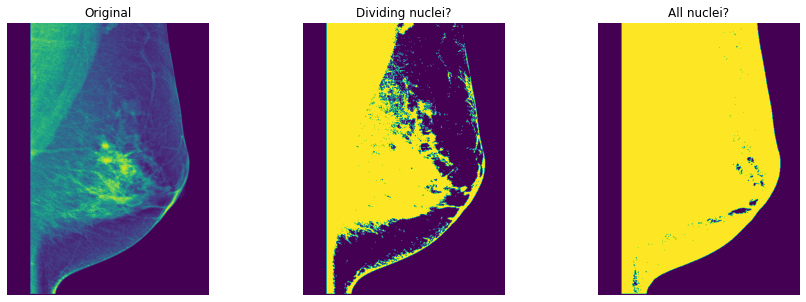

In [22]:
fig, ax = plt.subplots(ncols=3, figsize=(15, 5))
ax[0].imshow(img2)
ax[0].set_title('Original')
ax[0].axis('off')
ax[2].imshow(cells)
ax[2].set_title('All nuclei?')
ax[2].axis('off')
ax[1].imshow(dividing)
ax[1].set_title('Dividing nuclei?')
ax[1].axis('off')
plt.show()

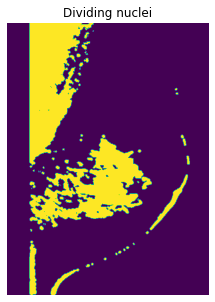

In [23]:
higher_threshold = 125
dividing = img2 > higher_threshold

smoother_dividing = filters.rank.mean(util.img_as_ubyte(dividing),
                                      morphology.disk(4))

binary_smoother_dividing = smoother_dividing > 20

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(binary_smoother_dividing)
ax.set_title('Dividing nuclei')
ax.axis('off')
plt.show()

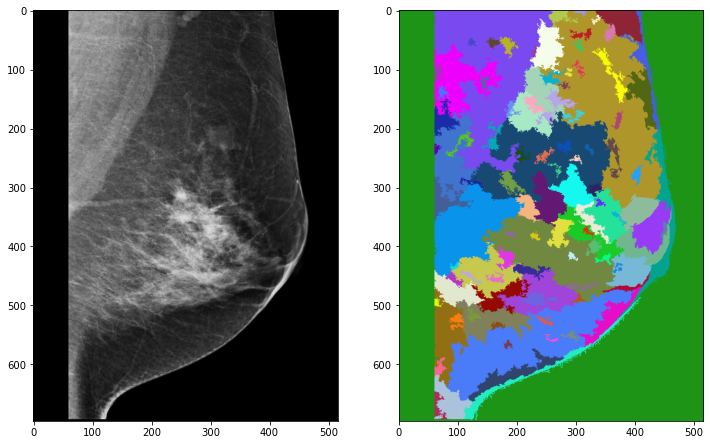

In [45]:
import numpy as np
from glob import glob
from PIL import Image
from matplotlib import pyplot as plt
from felzenszwalb_segmentation import segment


segmented_image = segment(img1, 0.3, 400, 100)

fig = plt.figure(figsize=(12, 12))
a = fig.add_subplot(1, 2, 1)
plt.imshow(img1)
a = fig.add_subplot(1, 2, 2)
plt.imshow(segmented_image.astype(np.uint8))
plt.show()

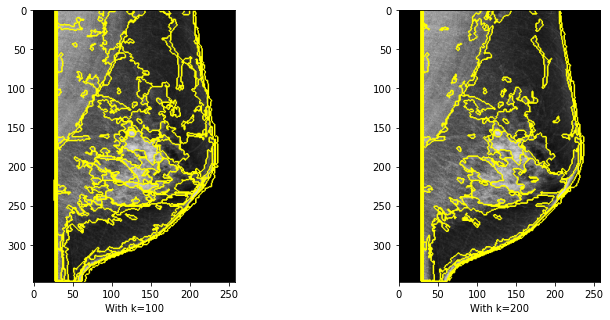

In [64]:
#import function for marking boundaries
from skimage.segmentation import mark_boundaries
from skimage.data import camera
from skimage.util import img_as_float

img = img_as_float(img1[::2, ::2])
res3 = skimage.segmentation.felzenszwalb(img, scale=100)
res4 = skimage.segmentation.felzenszwalb(img, scale=200)
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(mark_boundaries(img, res3)); ax1.set_xlabel("With k=100")
ax2.imshow(mark_boundaries(img, res4)); ax2.set_xlabel("With k=200")
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/hw17_100_200.png')
plt.show()

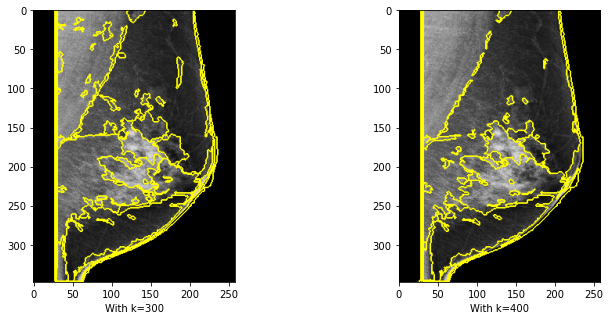

In [65]:
#import function for marking boundaries
from skimage.segmentation import mark_boundaries
from skimage.data import camera
from skimage.util import img_as_float

img = img_as_float(img1[::2, ::2])
res3 = skimage.segmentation.felzenszwalb(img, scale=300)
res4 = skimage.segmentation.felzenszwalb(img, scale=400)
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(mark_boundaries(img, res3)); ax1.set_xlabel("With k=300")
ax2.imshow(mark_boundaries(img, res4)); ax2.set_xlabel("With k=400")
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/hw17_300_400.png')
plt.show()

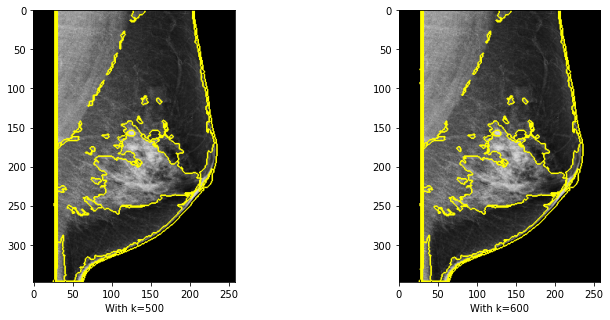

In [66]:
#import function for marking boundaries
from skimage.segmentation import mark_boundaries
from skimage.data import camera
from skimage.util import img_as_float

img = img_as_float(img1[::2, ::2])
res3 = skimage.segmentation.felzenszwalb(img, scale=500)
res4 = skimage.segmentation.felzenszwalb(img, scale=600)
fig = plt.figure(figsize=(12, 5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
ax1.imshow(mark_boundaries(img, res3)); ax1.set_xlabel("With k=500")
ax2.imshow(mark_boundaries(img, res4)); ax2.set_xlabel("With k=600")
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/hw17_500_600.png')
plt.show()

In [67]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline   
plt.rcParams['image.cmap'] = 'gray'

import pandas as pd

In [68]:
def gen_mnist_image(X):
    return np.rollaxis(np.rollaxis(X[0:200].reshape(20, -1, 28, 28), 0, 2), 1, 3).reshape(-1, 20 * 28)

In [71]:
X_train = pd.read_csv('/Users/MayraBerrones/Downloads/train/train.csv').values[:,1:]
X_train = (X_train - np.min(X_train, 0)) / (np.max(X_train, 0) + 0.0001)  # 0-1 scaling

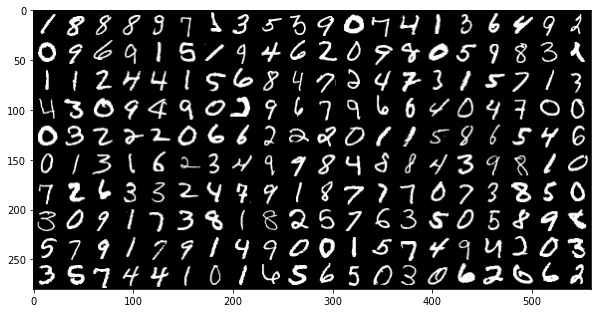

In [79]:
plt.figure(figsize=(10,20))
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/hw17_mnist.png')
plt.imshow(gen_mnist_image(X_train))

In [73]:
from sklearn.neural_network import BernoulliRBM
rbm = BernoulliRBM(n_components=100, learning_rate=0.01, random_state=0, verbose=True)
rbm.fit(X_train)

[BernoulliRBM] Iteration 1, pseudo-likelihood = -119.88, time = 2.26s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -104.69, time = 2.77s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -97.89, time = 2.77s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -92.88, time = 2.79s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -90.28, time = 2.77s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -88.92, time = 2.75s
[BernoulliRBM] Iteration 7, pseudo-likelihood = -86.35, time = 2.72s
[BernoulliRBM] Iteration 8, pseudo-likelihood = -84.65, time = 2.80s
[BernoulliRBM] Iteration 9, pseudo-likelihood = -83.90, time = 2.78s
[BernoulliRBM] Iteration 10, pseudo-likelihood = -82.19, time = 2.74s


BernoulliRBM(learning_rate=0.01, n_components=100, random_state=0, verbose=True)

In [74]:
xx = X_train[:40].copy()
for ii in range(1000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])

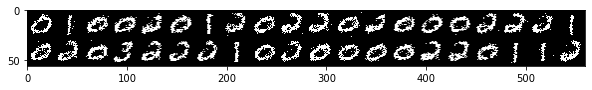

In [80]:
plt.figure(figsize=(10,20))
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/hw17_mnist_1.png')
plt.imshow(gen_mnist_image(xx))

In [76]:
xx = X_train[:40].copy()
for ii in range(10000):
    for n in range(40):
        xx[n] = rbm.gibbs(xx[n])


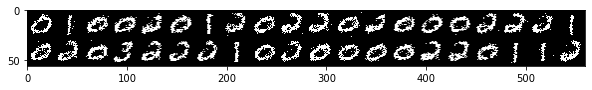

In [81]:
plt.figure(figsize=(10,20))
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/hw17_mnist2.png')
plt.imshow(gen_mnist_image(xx))

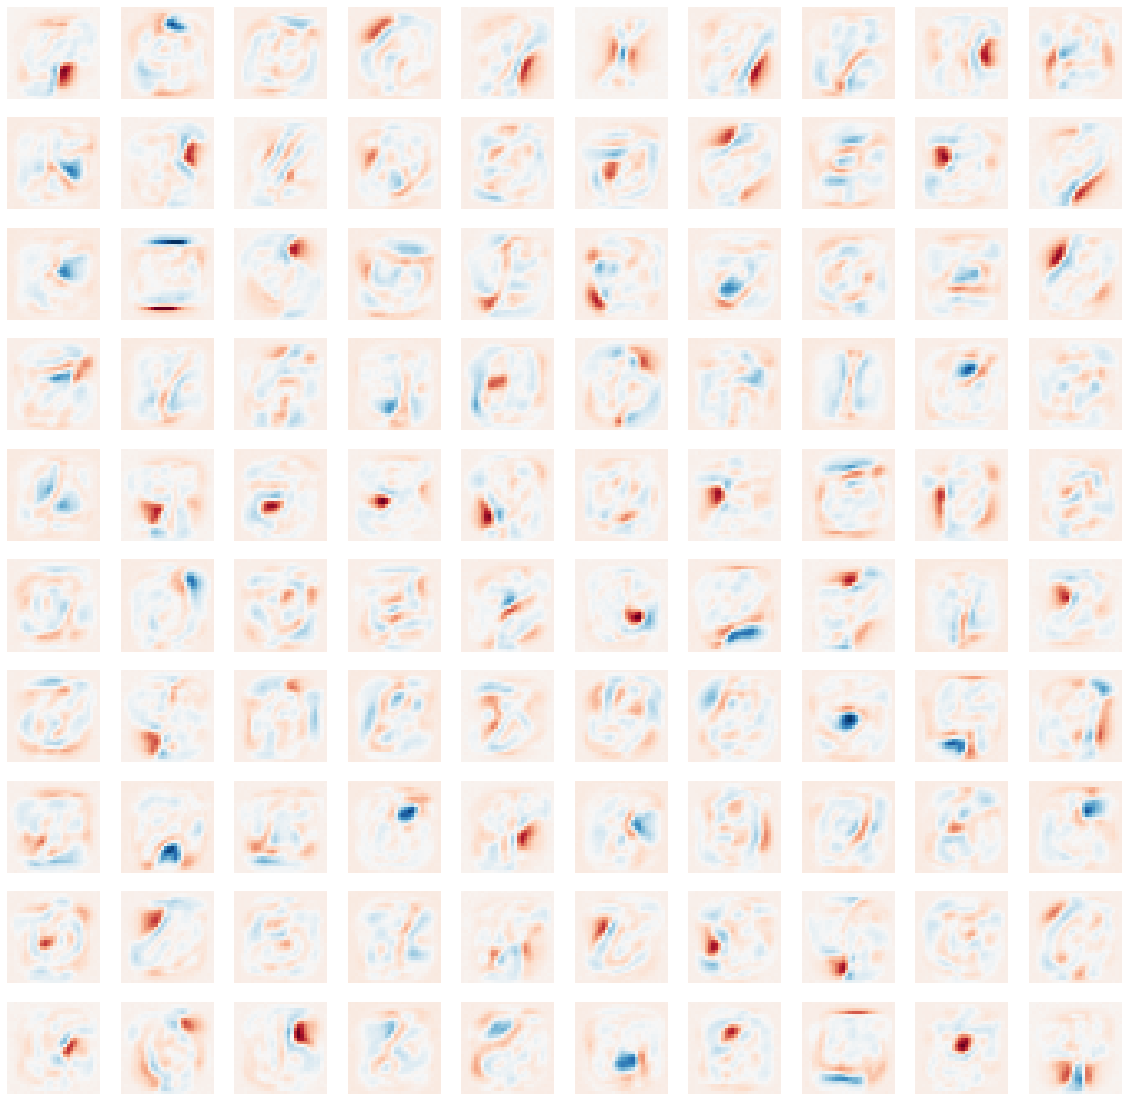

In [82]:
plt.figure(figsize=(20, 20))
for i, comp in enumerate(rbm.components_):
    plt.subplot(10, 10, i + 1)
    plt.imshow(comp.reshape((28, 28)), cmap=plt.cm.RdBu,
               interpolation='nearest', vmin=-2.5, vmax=2.5)
    plt.axis('off')
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/hw17_mnist_features.png')